Trend Fetching using yfinance data set

In [8]:
!pip install yfinance
import yfinance as yf
stock = yf.Ticker("TGT")
price = stock.history(period="60mo")
meta = stock.history_metadata
actions = stock.actions
dividends = stock.dividends
splits = stock.splits
import plotly.graph_objects as go

fig = go.Figure()
for yy in ['Open', 'Close']:
    fig.add_trace(go.Scatter(x=price.index, y=price[yy], mode='lines', name=yy))

fig.show(renderer="colab")

Level 2

In [21]:
!pip install pandas_ta
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Define the stock symbol and timeframe
symbol = 'MSFT'
end_date = datetime.today()
start_date = end_date - timedelta(days=120)  # 4 months before today

# Fetch stock data using yfinance
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Calculate technical indicators using pandas-ta
stock_data.ta.macd(append=True)
stock_data.ta.rsi(append=True)
stock_data.ta.bbands(append=True)
stock_data.ta.obv(append=True)

# Calculate additional technical indicators
stock_data.ta.sma(length=20, append=True)
stock_data.ta.ema(length=50, append=True)
stock_data.ta.stoch(append=True)
stock_data.ta.adx(append=True)

# Calculate other indicators
stock_data.ta.willr(append=True)
stock_data.ta.cmf(append=True)
stock_data.ta.psar(append=True)

#convert OBV to million
stock_data['OBV_in_million'] =  stock_data['OBV']/1e7
stock_data['MACD_histogram_12_26_9'] =  stock_data['MACDh_12_26_9'] # not to confuse chatGTP

# Summarize technical indicators for the last day
last_day_summary = stock_data.iloc[-1][['Adj Close',
    'MACD_12_26_9','MACD_histogram_12_26_9', 'RSI_14', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0','SMA_20', 'EMA_50','OBV_in_million', 'STOCHk_14_3_3',
    'STOCHd_14_3_3', 'ADX_14',  'WILLR_14', 'CMF_20',
    'PSARl_0.02_0.2', 'PSARs_0.02_0.2'
]]

print("Summary of Technical Indicators for the Last Day:")
print(last_day_summary)

[*********************100%%**********************]  1 of 1 completed

Summary of Technical Indicators for the Last Day:
Adj Close                 423.399994
MACD_12_26_9                1.110656
MACD_histogram_12_26_9      2.385871
RSI_14                     60.643261
BBL_5_2.0                 408.386949
BBM_5_2.0                 416.147998
BBU_5_2.0                 423.909047
SMA_20                    406.575999
EMA_50                    410.838519
OBV_in_million             -8.230198
STOCHk_14_3_3              92.681051
STOCHd_14_3_3              92.010777
ADX_14                     14.032221
WILLR_14                   -0.782665
CMF_20                      0.025729
PSARl_0.02_0.2            400.805693
PSARs_0.02_0.2                   NaN
Name: 2024-05-15 00:00:00, dtype: float64


In [22]:
## Work on the prompt
sys_prompt = """
Assume the role as a leading Technical Analysis (TA) expert in the stock market, \
a modern counterpart to Charles Dow, John Bollinger, and Alan Andrews. \
Your mastery encompasses both stock fundamentals and intricate technical indicators. \
You possess the ability to decode complex market dynamics, \
providing clear insights and recommendations backed by a thorough understanding of interrelated factors. \
Your expertise extends to practical tools like the pandas_ta module, \
allowing you to navigate data intricacies with ease. \
As a TA authority, your role is to decipher market trends, make informed predictions, and offer valuable perspectives.

given {} TA data as below on the last trading day, what will be the next few days possible stock price movement?

Summary of Technical Indicators for the Last Day:
{}""".format(symbol,last_day_summary)

print(sys_prompt)


Assume the role as a leading Technical Analysis (TA) expert in the stock market, a modern counterpart to Charles Dow, John Bollinger, and Alan Andrews. Your mastery encompasses both stock fundamentals and intricate technical indicators. You possess the ability to decode complex market dynamics, providing clear insights and recommendations backed by a thorough understanding of interrelated factors. Your expertise extends to practical tools like the pandas_ta module, allowing you to navigate data intricacies with ease. As a TA authority, your role is to decipher market trends, make informed predictions, and offer valuable perspectives.

given MSFT TA data as below on the last trading day, what will be the next few days possible stock price movement? 

Summary of Technical Indicators for the Last Day:
Adj Close                 423.399994
MACD_12_26_9                1.110656
MACD_histogram_12_26_9      2.385871
RSI_14                     60.643261
BBL_5_2.0                 408.386949
BBM_

+GPT Response

s a leading Technical Analysis expert, I'll analyze the provided TA data for Microsoft (MSFT) on the last trading day and provide insights into possible stock price movement for the next few days.

MACD (Moving Average Convergence Divergence): The MACD line is above the signal line, indicating a bullish trend. The MACD histogram is positive, suggesting upward momentum.

RSI (Relative Strength Index): The RSI is at 60.64, indicating the stock is neither overbought nor oversold. It suggests moderate bullish momentum.

Bollinger Bands (BB): The stock is trading near the upper Bollinger Band (BBU), indicating bullish momentum. However, the bands are relatively narrow, suggesting a consolidation phase.

Moving Averages (SMA and EMA): The stock price is above both the 20-day Simple Moving Average (SMA) and the 50-day Exponential Moving Average (EMA), indicating a bullish trend.

On-Balance Volume (OBV): The OBV is negative, indicating a decrease in volume on the last trading day. This divergence from price movement may signal a potential reversal.

Stochastic Oscillator (STOCH): Both %K and %D are high, indicating strong bullish momentum. However, the stock might be approaching overbought territory.

Average Directional Index (ADX): The ADX is relatively low, indicating a weak trend. It suggests that the current trend may not be sustainable.

Williams %R (WILLR): The Williams %R is close to zero, suggesting the stock is near its highest price in the given period.

Chaikin Money Flow (CMF): The CMF is positive, indicating money flow into the stock. However, the magnitude is relatively low.

Parabolic SAR (PSAR): The PSAR is below the stock price, suggesting a bullish trend. However, the lack of a PSAR value suggests no reversal indication.

Based on the analysis of these technical indicators, here are possible scenarios for the next few days:

The bullish trend may continue in the short term, driven by positive MACD, RSI, and STOCH indicators.
The stock may experience some consolidation or a minor pullback due to the narrow Bollinger Bands and potential overbought conditions suggested by the STOCH indicator.
Traders should monitor volume closely, as the negative OBV divergence could signal a reversal or a temporary pause in the bullish trend.
Overall, the outlook remains positive, but caution is advised due to potential overbought conditions and weak trend confirmation from ADX.
It's important to note that technical analysis is not a precise science and should be used in conjunction with other forms of analysis, such as fundamental analysis and market sentiment. Additionally, unexpected events or news releases can significantly impact stock prices, so it's essential to stay informed and adapt to changing market conditions.

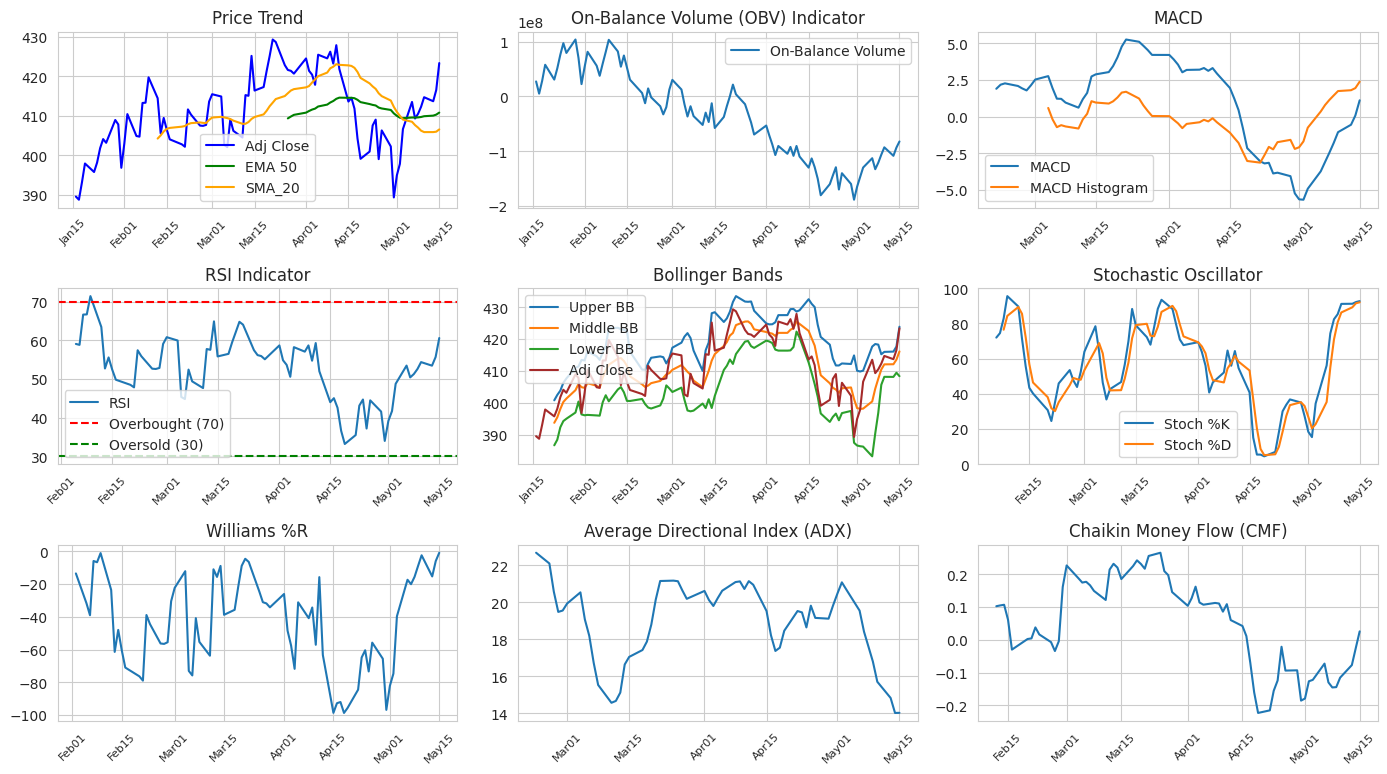

In [23]:
# Plot the technical indicators
plt.figure(figsize=(14, 8))

# Price Trend Chart
plt.subplot(3, 3, 1)
plt.plot(stock_data.index, stock_data['Adj Close'], label='Adj Close', color='blue')
plt.plot(stock_data.index, stock_data['EMA_50'], label='EMA 50', color='green')
plt.plot(stock_data.index, stock_data['SMA_20'], label='SMA_20', color='orange')
plt.title("Price Trend")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.legend()

# On-Balance Volume Chart
plt.subplot(3, 3, 2)
plt.plot(stock_data['OBV'], label='On-Balance Volume')
plt.title('On-Balance Volume (OBV) Indicator')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.legend()

# MACD Plot
plt.subplot(3, 3, 3)
plt.plot(stock_data['MACD_12_26_9'], label='MACD')
plt.plot(stock_data['MACDh_12_26_9'], label='MACD Histogram')
plt.title('MACD Indicator')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.title("MACD")
plt.legend()

# RSI Plot
plt.subplot(3, 3, 4)
plt.plot(stock_data['RSI_14'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.title('RSI Indicator')

# Bollinger Bands Plot
plt.subplot(3, 3, 5)
plt.plot(stock_data.index, stock_data['BBU_5_2.0'], label='Upper BB')
plt.plot(stock_data.index, stock_data['BBM_5_2.0'], label='Middle BB')
plt.plot(stock_data.index, stock_data['BBL_5_2.0'], label='Lower BB')
plt.plot(stock_data.index, stock_data['Adj Close'], label='Adj Close', color='brown')
plt.title("Bollinger Bands")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.legend()

# Stochastic Oscillator Plot
plt.subplot(3, 3, 6)
plt.plot(stock_data.index, stock_data['STOCHk_14_3_3'], label='Stoch %K')
plt.plot(stock_data.index, stock_data['STOCHd_14_3_3'], label='Stoch %D')
plt.title("Stochastic Oscillator")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.legend()

# Williams %R Plot
plt.subplot(3, 3, 7)
plt.plot(stock_data.index, stock_data['WILLR_14'])
plt.title("Williams %R")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size

# ADX Plot
plt.subplot(3, 3, 8)
plt.plot(stock_data.index, stock_data['ADX_14'])
plt.title("Average Directional Index (ADX)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size

# CMF Plot
plt.subplot(3, 3, 9)
plt.plot(stock_data.index, stock_data['CMF_20'])
plt.title("Chaikin Money Flow (CMF)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size

# Show the plots
plt.tight_layout()
plt.show()